<a href="https://colab.research.google.com/github/mnaznin/Admission-Data-Science-Project/blob/main/AdmissionDSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

Using Data Science expertise to explore the state of Grad Admissions in the US. This will not only help us prepare for our path to Academia but will educate us on some seemingly unknown facts about the state of Grad School in the US.

# Problem Description
The few problem domain we would like to explore are:<br>
1. What is the MOST important element of a Grad school application package? GRE?<br>
2. Does Higher Enrollment of Non-resident Alien Decreases the Number of Women enrollment?<br>
3. Does the admission rate decrease with higher number of applicants?

# Background

An average Grad school application package consists of:

1. GPA
2. Letter of Recommendation
3. Statement of Purpose
4. GRE scores
5. TOEFL scores (for international students)
6. Research Papers
7. Publications, etc.

# Subject Matter Expertise

1. USEF (United States Education Foundation) could help undestand problems of International student: The foundation’s primary objective is to promote international education.
2. Admissions office could help understand how the Graduate admission process works.
3. Society of Women Engineers could help understand the problems faced women in getting into grad school.

# Assumptions

1. It is assumed that the reader is interested in getting into Grad school and is familiar with the terms like GRE, TOEFL, enrollment.
2. It is assumed that the dataset would only involve the colleges and universities in the US.
3. It is also assumed that the data is applicable for existing Grad school.
4. It is also assumed that the reader will have a good grasp of how the US grad school application system works.
5. Assume that the data is not effected by the current pandemic for the year 2019 & 2020 applications.


# Steps to Explore the Topic and Problem
1. Download data from IEEE & Kaggle
2. Web-scrape data from Wikipedia
3. Clean the dataset to remove Null values and outliers if needed.
4. Clean the web scraped dataset to extract the sub-table from the embedded dataset.
5. Check the normality of the data we are interested in.
6. Find if GRE scores and chance of admissions had some sort of correlation using descriptive & inferential stats.
7. Find if Enrollment of nonresident aliens versus percentage of women of admissions had some sort of correlation using descriptive & inferential stats.
8. Find if number of applicants and admission rate had some sort of correlation using descriptive & inferential stats.
9. Draw hypothesis for 6, 7 and 8 based on the stats we observed.
10. Apply hypothesis testing techniques on 6, 7 & 8 and support the hypothesis using simulations of test_statistic, p-values, correlation and linear regression.
11. Draw conclusions form your hypothesis.

# Data Sources:

1. IEEE, Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019. 'https://www.kaggle.com/mohansacharya/graduate-admissions'<br>
2. Kaggle “American University Data” IPEDS dataset 'https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset'<br>
3. Scrapped Dataset: College admissions in the United States, 'https://en.wikipedia.org/wiki/College_admissions_in_the_United_States'

# Setup
Let's install and import all the required libraries.

In [ ]:
# Installing required libraries 

# xlrd is needed to load excel files - UNCOMMENT IF YOU CANT READ FILES
# !pip3 install xlrd
# !pip3 install psycopg2

In [ ]:
# Importing required libraries
from datascience import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from scipy.stats import chisquare

from urllib.request import urlopen
from bs4 import BeautifulSoup
!pip install tabulate
from tabulate import tabulate
print("Setup Completed.")

Setup Completed.


# Data Exploration
Describing the data using what we know. For larger datasets we pulled out columns that are of interst to us.

In [ ]:
grad_admission = pd.read_csv("US_graduate_schools_admission_parameters_dataset.csv")
grad_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
row, col = grad_admission.shape
print('Number of rows:',row)
print('Number of columns:',col)

Number of rows: 400
Number of columns: 9


The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )


In [ ]:
american_university_data = pd.read_excel("IPEDS_data.xlsx")
american_university_data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [ ]:
row, col = american_university_data.shape
print('Number of rows:',row)
print('Number of columns:',col)

Number of rows: 1534
Number of columns: 145


This dataset is very large with **145** columns. We want to look at the relation between graduate student enrollment of Nonresident Alien and Women. Hence, we will use these columns from the dataset to create a new dataframe.

In [ ]:
graduate_enrollment = american_university_data[[
    'Percent of graduate enrollment that are Nonresident Alien',
    'Percent of graduate enrollment that are women'
]]
graduate_enrollment

,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are women
0,0.0,69.0
1,6.0,64.0
2,0.0,55.0
3,14.0,43.0
4,1.0,71.0
...,...,...
1529,4.0,65.0
1530,NaN,NaN
1531,0.0,60.0
1532,NaN,NaN


In [ ]:
# Scrapping data to find the 
url = "https://en.wikipedia.org/wiki/College_admissions_in_the_United_States"
html = urlopen(url)
soup = BeautifulSoup(html.read(),'html.parser')
table = soup.find_all('table') 
df = pd.read_html(str(table))
university_admits = pd.DataFrame(df[1])
display(university_admits.describe())
display(university_admits)

Total (56 institutions)                                        \
           Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
                         Apps             Admits             Enroll   
count            1.900000e+01          19.000000          19.000000   
mean             1.048592e+06      225986.105263       88433.578947   
std              3.261943e+05       15500.616131        5322.166709   
min              6.451110e+05      198815.000000       79872.000000   
25%              7.554335e+05      213666.000000       83791.000000   
50%              1.004309e+06      225082.000000       88205.000000   
75%              1.302571e+06      240057.000000       92630.500000   
max              1.639951e+06      242910.000000       96815.000000   

                          \
      Unnamed: 5_level_1   
            Admit:Enroll   
count          19.000000   
mean            2.557368   
std             0.132155   
min             2.230000   
25%             2.485000   
50%             2.570000   
75%             2.640000   
max             2.740000   

                                                                                                                                                                        27 private universities  \
      Ivy League, Stanford, MIT, Chicago, Duke, Northwestern, Vanderbilt, Johns Hopkins, Rice, USC, WUSTL, Tulane, Tufts, Georgetown, Carnegie Mellon, Notre Dame, Emory, NYU, BU, Northeastern   
                                                                                                                                                                                           Apps   
count                                       1.900000e+01                                                                                                                                          
mean                                        6.888550e+05                                                                                                                                          
std                                         2.095399e+05                                                                                                                                          
min                                         4.158550e+05                                                                                                                                          
25%                                         5.001575e+05                                                                                                                                          
50%                                         6.853430e+05                                                                                                                                          
75%                                         8.482905e+05                                                                                                                                          
max                                         1.060372e+06                                                                                                                                          

                                                 \
                                                  
              Admits        Enroll Admit:Enroll   
count      19.000000     19.000000    19.000000   
mean   135323.842105  51395.210526     2.635789   
std     10258.641692   2145.224841     0.197718   
min    115069.000000  46931.000000     2.140000   
25%    126472.500000  49798.500000     2.555000   
50%    135960.000000  51655.000000     2.660000   
75%    142237.000000  52995.500000     2.750000   
max    151508.000000  54826.000000     2.930000   

                                                               6 public universities  \
      UCLA, UC Berkeley, Georgia Tech, UNC-Chapel Hill, Michigan Ann Arbor, Virginia   
                               

Unnamed: 0_level_0 Total (56 institutions)                     \
   Unnamed: 0_level_1      Unnamed: 1_level_1 Unnamed: 2_level_1   
           Admit Year                    Apps             Admits   
0             2001-02                  645111             198815   
1             2002-03                  650908             202565   
2             2003-04                  681989             206423   
3             2004-05                  699074             207238   
4             2005-06                  737493             213865   
5             2006-07                  773374             217846   
6             2007-08                  820664             220242   
7             2008-09                  899001             224983   
8             2009-10                  942859             237154   
9             2010-11                 1004309             242075   
10            2011-12                 1073088             242265   
11            2012-13                 1125056             239427   
12            2013-14                 1195869             237747   
13            2014-15                 1279412             242628   
14            2015-16                 1325730             240687   
15            2016-17                 1390056             242910   
16            2017-18                 1451021             238317   
17            2018-19                 1588286             225082   
18       2019–20(est)                 1639951             213467   

                                                             \
   Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
               Enroll         Admit Rate       Admit:Enroll   
0               79872              30.8%               2.49   
1               82026              31.1%               2.47   
2               82544              30.3%               2.50   
3               83682              29.6%               2.48   
4               83591              29.0%               2.56   
5               83900              28.2%               2.60   
6               85739              26.8%               2.57   
7               85599              25.0%               2.63   
8               87199              25.2%               2.72   
9               88205              24.1%               2.74   
10              88619              22.6%               2.73   
11              89897              21.3%               2.66   
12              89585              19.9%               2.65   
13              92713              19.0%               2.62   
14              92548              18.2%               2.60   
15              95213              17.5%               2.55   
16              96667              16.4%               2.47   
17              96815              14.2%               2.32   
18              95824              13.0%               2.23   

                                                                                                                                                                     27 private universities  \
   Ivy League, Stanford, MIT, Chicago, Duke, Northwestern, Vanderbilt, Johns Hopkins, Rice, USC, WUSTL, Tulane, Tufts, Georgetown, Carnegie Mellon, Notre Dame, Emory, NYU, BU, Northeastern   
                                                                                                                                                                                        Apps   
0                                              415855                                                                                                                                          
1                                              418230                                                                                                                                          
2                                              439502                                                                                                          

We can see that every year the number of applicants are increasing but the acceptance rate is decreasing.

# Data Cleaning

In [ ]:
# We don't need Serial number for the our analysis because
# it is just a counter.
grad_admission = grad_admission.drop(['Serial No.'], axis=1)
grad_admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Let's check for any null values.
grad_admission.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# We want to make the correlation much understandable
# so we will transform the CGPA which is a 10 point 
# international standard to a 4 point GPA which is more
# valid in USA.
def convertCGPAtoGPA(CGPA):
    percentage_obtained = CGPA * 10
    GPA = (percentage_obtained / 100) * 4
    return GPA
grad_admission['GPA'] = grad_admission['CGPA'].apply(convertCGPAtoGPA)
grad_admission

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GPA
0,337,118,4,4.5,4.5,9.65,1,0.92,3.860
1,324,107,4,4.0,4.5,8.87,1,0.76,3.548
2,316,104,3,3.0,3.5,8.00,1,0.72,3.200
3,322,110,3,3.5,2.5,8.67,1,0.80,3.468
4,314,103,2,2.0,3.0,8.21,0,0.65,3.284
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,3.616
396,325,107,3,3.0,3.5,9.11,1,0.84,3.644
397,330,116,4,5.0,4.5,9.45,1,0.91,3.780
398,312,103,3,3.5,4.0,8.78,0,0.67,3.512


In [ ]:
print(grad_admission.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'GPA'],
      dtype='object')


In [ ]:
# Note that the column name LOR has a trailing whitespace.
# which looks like 'LOR '. Same for 'Chance of Admit '.
# This will be confusing so, let's remove the trailing 
# whitespace.
grad_admission.rename(columns={'Chance of Admit ': 'Chance_of_Admit', 'LOR ': 'LOR', 'TOEFL Score': 'TOEFL_Score', 'University Rating': 'University_Rating', 'GRE Score': 'GRE_Score'}, inplace=True)
print(grad_admission.columns)

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'GPA'],
      dtype='object')


In [ ]:
# Helper function for Outlier detection using z-score
def findOutlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [ ]:
# Detecting outliers
findOutlier(grad_admission)

There are 8 outliers in GRE_Score feature
There are 8 outliers in TOEFL_Score feature
There are 0 outliers in University_Rating feature
There are 0 outliers in SOP feature
There are 0 outliers in LOR feature
There are 7 outliers in CGPA feature
There are 0 outliers in Research feature
There are 0 outliers in Chance_of_Admit feature
There are 7 outliers in GPA feature


[[340, 340, 340, 340, 340, 340, 340, 340],
 [120, 120, 120, 120, 120, 120, 120, 120],
 [],
 [],
 [],
 [9.8, 9.8, 9.92, 9.8, 9.91, 9.87, 9.82],
 [],
 [],
 [3.92, 3.92, 3.968, 3.92, 3.964, 3.9479999999999995, 3.928]]

**All the outliers are the highest scores obtained. We would like to keep these because this will help us model data better.**

Now, we will look at the `graduate_enrollment` dataset for data cleaning. Let's check for any null values. 

In [ ]:
# Let's check for any null values.
graduate_enrollment.isnull().sum()

Percent of graduate enrollment that are Nonresident Alien    265
Percent of graduate enrollment that are women                265
dtype: int64

In [ ]:
# We will drop NaN Values
graduate_enrollment = graduate_enrollment.dropna()
graduate_enrollment

,Percent of graduate enrollment that are Nonresident Alien,Percent of graduate enrollment that are women
0,0.0,69.0
1,6.0,64.0
2,0.0,55.0
3,14.0,43.0
4,1.0,71.0
...,...,...
1527,0.0,58.0
1528,0.0,54.0
1529,4.0,65.0
1531,0.0,60.0


For easy usage, we are going to rename the column names of `graduate_enrollment` dataframe.

In [ ]:
graduate_enrollment = graduate_enrollment.rename(columns={'Percent of graduate enrollment that are Nonresident Alien': 'Nonresident_Alien',  'Percent of graduate enrollment that are women': 'Women'})
graduate_enrollment

,Nonresident_Alien,Women
0,0.0,69.0
1,6.0,64.0
2,0.0,55.0
3,14.0,43.0
4,1.0,71.0
...,...,...
1527,0.0,58.0
1528,0.0,54.0
1529,4.0,65.0
1531,0.0,60.0


In [ ]:
# Detecting outliers in graduate_enrollment
findOutlier(graduate_enrollment)

There are 56 outliers in Nonresident_Alien feature
There are 20 outliers in Women feature


[[32.0,
  41.0,
  31.0,
  42.0,
  90.0,
  97.0,
  36.0,
  33.0,
  33.0,
  42.0,
  41.0,
  37.0,
  59.0,
  100.0,
  31.0,
  78.0,
  31.0,
  34.0,
  32.0,
  44.0,
  41.0,
  35.0,
  36.0,
  63.0,
  34.0,
  55.0,
  33.0,
  45.0,
  30.0,
  43.0,
  39.0,
  45.0,
  36.0,
  30.0,
  34.0,
  39.0,
  49.0,
  69.0,
  49.0,
  54.0,
  30.0,
  35.0,
  32.0,
  33.0,
  55.0,
  56.0,
  34.0,
  39.0,
  59.0,
  31.0,
  38.0,
  35.0,
  34.0,
  52.0,
  40.0,
  61.0],
 [100.0,
  100.0,
  100.0,
  92.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  93.0,
  96.0,
  92.0,
  100.0,
  96.0,
  100.0,
  100.0,
  92.0,
  100.0,
  100.0,
  100.0]]

Let's visualize these data more before we get rid of any **outliers**. 

### Cleaning of the scraped Data

In [ ]:
university_admits.columns = university_admits.columns.droplevel()
university_admits.columns = university_admits.columns.droplevel()
university_admits

,Admit Year,Apps,Admits,Enroll,Admit Rate,Admit:Enroll,Apps,Admits,Enroll,Admit Rate,...,Apps,Admits,Enroll,Admit Rate,Admit:Enroll,Apps,Admits,Enroll,Admit Rate,Admit:Enroll
0,2001-02,645111,198815,79872,30.8%,2.49,415855,120124,46931,28.9%,...,138627,49041,22110,35.4%,2.22,90629,29650,10831,32.7%,2.74
1,2002-03,650908,202565,82026,31.1%,2.47,418230,123779,48626,29.6%,...,141166,49377,22264,35.0%,2.22,91512,29409,11136,32.1%,2.64
2,2003-04,681989,206423,82544,30.3%,2.50,439502,126504,49491,28.8%,...,146165,50209,22262,34.4%,2.26,96322,29710,10791,30.8%,2.75
3,2004-05,699074,207238,83682,29.6%,2.48,453319,126441,49615,27.9%,...,144258,50923,23169,35.3%,2.20,101497,29874,10898,29.4%,2.74
4,2005-06,737493,213865,83591,29.0%,2.56,484023,132750,49982,27.4%,...,147507,51430,22639,34.9%,2.27,105963,29685,10970,28.0%,2.71
5,2006-07,773374,217846,83900,28.2%,2.60,516292,135568,49507,26.3%,...,148794,52343,23589,35.2%,2.22,108288,29935,10804,27.6%,2.77
6,2007-08,820664,220242,85739,26.8%,2.57,542066,135960,50249,25.1%,...,163374,54788,24637,33.5%,2.22,115224,29494,10853,25.6%,2.72
7,2008-09,899001,224983,85599,25.0%,2.63,599122,140482,50101,23.4%,...,172826,54634,24347,31.6%,2.24,127053,29867,11151,23.5%,2.68
8,2009-10,942859,237154,87199,25.2%,2.72,634067,148579,51283,23.4%,...,186771,58364,24830,31.2%,2.35,122021,30211,11086,24.8%,2.73
9,2010-11,1004309,242075,88205,24.1%,2.74,685343,151508,51655,22.1%,...,192770,59986,25175,31.1%,2.38,126196,30581,11375,24.2%,2.69


In [ ]:
private_uni_admits = university_admits.iloc[:, :6]
private_uni_admits

,Admit Year,Apps,Admits,Enroll,Admit Rate,Admit:Enroll
0,2001-02,645111,198815,79872,30.8%,2.49
1,2002-03,650908,202565,82026,31.1%,2.47
2,2003-04,681989,206423,82544,30.3%,2.50
3,2004-05,699074,207238,83682,29.6%,2.48
4,2005-06,737493,213865,83591,29.0%,2.56
5,2006-07,773374,217846,83900,28.2%,2.60
6,2007-08,820664,220242,85739,26.8%,2.57
7,2008-09,899001,224983,85599,25.0%,2.63
8,2009-10,942859,237154,87199,25.2%,2.72
9,2010-11,1004309,242075,88205,24.1%,2.74


In [ ]:
def convert_percentage_to_float(x):
    return float(x.strip('%'))/100

private_uni_admits['Admit Rate'] = private_uni_admits['Admit Rate'].str.rstrip('%').astype('float') / 100.0
private_uni_admits

,Admit Year,Apps,Admits,Enroll,Admit Rate,Admit:Enroll
0,2001-02,645111,198815,79872,0.308,2.49
1,2002-03,650908,202565,82026,0.311,2.47
2,2003-04,681989,206423,82544,0.303,2.50
3,2004-05,699074,207238,83682,0.296,2.48
4,2005-06,737493,213865,83591,0.290,2.56
5,2006-07,773374,217846,83900,0.282,2.60
6,2007-08,820664,220242,85739,0.268,2.57
7,2008-09,899001,224983,85599,0.250,2.63
8,2009-10,942859,237154,87199,0.252,2.72
9,2010-11,1004309,242075,88205,0.241,2.74


# Describe the Data Using Descriptive Stats
Using descriptive stats to talk about our data. Includes mean, median, and mode where applicable and talks about normality of data.

In [ ]:
print("Analysis for US Graduate schools admission parameters")
print("Rows:", grad_admission.shape[0])
print("Columns:", grad_admission.shape[1])
print()

print("Stats about GRE Scores:")
print("Mean GRE score", round(grad_admission['GRE_Score'].mean(),2))
print("Median GRE score", round(grad_admission['GRE_Score'].median(),2))
print("Standard Deviation GRE score", round(grad_admission['GRE_Score'].std(),2))
print("Variance of GRE score", round(grad_admission['GRE_Score'].var(),2))
print()

print("Stats about TOEFL Scores:")
print("Mean TOEFL score", round(grad_admission['TOEFL_Score'].mean(),2))
print("Median TOEFL score", round(grad_admission['TOEFL_Score'].median(),2))
print("Standard Deviation TOEFL score", round(grad_admission['TOEFL_Score'].std(),2))
print("Variance of TOEFL score", round(grad_admission['TOEFL_Score'].var(),2))
print()

print("Stats about GPA Scores:")
print("Mean GPA score", round(grad_admission['GPA'].mean(),2))
print("Median GPA score", round(grad_admission['GPA'].median(),2))
print("Standard Deviation GPA score", round(grad_admission['GPA'].std(),2))
print("Variance of GPA score", round(grad_admission['GPA'].var(),2))
print()

Analysis for US Graduate schools admission parameters
Rows: 400
Columns: 9

Stats about GRE Scores:
Mean GRE score 316.81
Median GRE score 317.0
Standard Deviation GRE score 11.47
Variance of GRE score 131.64

Stats about TOEFL Scores:
Mean TOEFL score 107.41
Median TOEFL score 107.0
Standard Deviation TOEFL score 6.07
Variance of TOEFL score 36.84

Stats about GPA Scores:
Mean GPA score 3.44
Median GPA score 3.44
Standard Deviation GPA score 0.24
Variance of GPA score 0.06



**We see that both mean and median are either equal or very close to each other. The variance and SD for GPA is low  but the variance for GRE and TOEFL are pretty high.**

In [ ]:
print("Analysis for US University Enrollment for Nonresident Alien and Women:")
print("Rows:", graduate_enrollment.shape[0])
print("Columns:", graduate_enrollment.shape[1])
print()

print("Stats about Enrollment for Nonresident Alien:")
print("Mean enrollment of Nonresident Alien", round(graduate_enrollment['Nonresident_Alien'].mean(),2))
print("Median enrollment of Nonresident Alien", round(graduate_enrollment['Nonresident_Alien'].median(),2))
print("Standard enrollment of Nonresident Alien", round(graduate_enrollment['Nonresident_Alien'].std(),2))
print("Variance of enrollment of Nonresident Alien", round(graduate_enrollment['Nonresident_Alien'].var(),2))
print()

print("Stats about Enrollment for Women:")
print("Mean enrollment of Women", round(graduate_enrollment['Women'].mean(),2))
print("Median enrollment of Women", round(graduate_enrollment['Women'].median(),2))
print("Standard enrollment of Women", round(graduate_enrollment['Women'].std(),2))
print("Variance of enrollment of Women", round(graduate_enrollment['Women'].var(),2))
print()


Analysis for US University Enrollment for Nonresident Alien and Women:
Rows: 1269
Columns: 2

Stats about Enrollment for Nonresident Alien:
Mean enrollment of Nonresident Alien 7.55
Median enrollment of Nonresident Alien 3.0
Standard enrollment of Nonresident Alien 11.12
Variance of enrollment of Nonresident Alien 123.71

Stats about Enrollment for Women:
Mean enrollment of Women 63.11
Median enrollment of Women 64.0
Standard enrollment of Women 14.15
Variance of enrollment of Women 200.14



Let's look at the description of our data altogether.

In [ ]:
graduate_enrollment.describe()

,Nonresident_Alien,Women
count,1269.000000,1269.000000
mean,7.550039,63.109535
std,11.122634,14.147092
min,0.000000,0.000000
25%,1.000000,55.000000
50%,3.000000,64.000000
75%,10.000000,72.000000
max,100.000000,100.000000


In [ ]:
print("Analysis for US Private University Applications, Admission and Enrollment:")
print("Rows:", private_uni_admits.shape[0])
print("Columns:", private_uni_admits.shape[1])
print()

print("Stats about number of applications:")
print("Mean number of applications", round(private_uni_admits['Apps'].mean(),2))
print("Median number of applications", round(private_uni_admits['Apps'].median(),2))
print("Standard number of applications", round(private_uni_admits['Apps'].std(),2))
print("Variance of number of applications", round(private_uni_admits['Apps'].var(),2))
print()

print("Stats about number of admitted students:")
print("Mean number of admitted students", round(private_uni_admits['Admits'].mean(),2))
print("Median number of admitted students", round(private_uni_admits['Admits'].median(),2))
print("Standard number of admitted students", round(private_uni_admits['Admits'].std(),2))
print("Variance of number of admitted students", round(private_uni_admits['Admits'].var(),2))
print()

print("Stats about number of enrolled:")
print("Mean number of enrolled", round(private_uni_admits['Enroll'].mean(),2))
print("Median number of enrolled", round(private_uni_admits['Enroll'].median(),2))
print("Standard number of enrolled", round(private_uni_admits['Enroll'].std(),2))
print("Variance of number of enrolled", round(private_uni_admits['Enroll'].var(),2))
print()

print("Stats about students who are enrolled and admited:")
print("Mean number Admit:Enroll", round(private_uni_admits['Admit:Enroll'].mean(),2))
print("Median number Admit:Enroll", round(private_uni_admits['Admit:Enroll'].median(),2))
print("Standard number Admit:Enroll ", round(private_uni_admits['Admit:Enroll'].std(),2))
print("Variance of Admit:Enroll", round(private_uni_admits['Admit:Enroll'].var(),2))
print()

Analysis for US Private University Applications, Admission and Enrollment:
Rows: 19
Columns: 6

Stats about number of applications:
Mean number of applications 1048592.16
Median number of applications 1004309.0
Standard number of applications 326194.32
Variance of number of applications 106402733314.25

Stats about number of admitted students:
Mean number of admitted students 225986.11
Median number of admitted students 225082.0
Standard number of admitted students 15500.62
Variance of number of admitted students 240269100.43

Stats about number of enrolled:
Mean number of enrolled 88433.58
Median number of enrolled 88205.0
Standard number of enrolled 5322.17
Variance of number of enrolled 28325458.48

Stats about students who are enrolled and admited:
Mean number Admit:Enroll 2.56
Median number Admit:Enroll 2.57
Standard number Admit:Enroll  0.13
Variance of Admit:Enroll 0.02



# Data Visualization

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'GPA'],
      dtype='object')


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


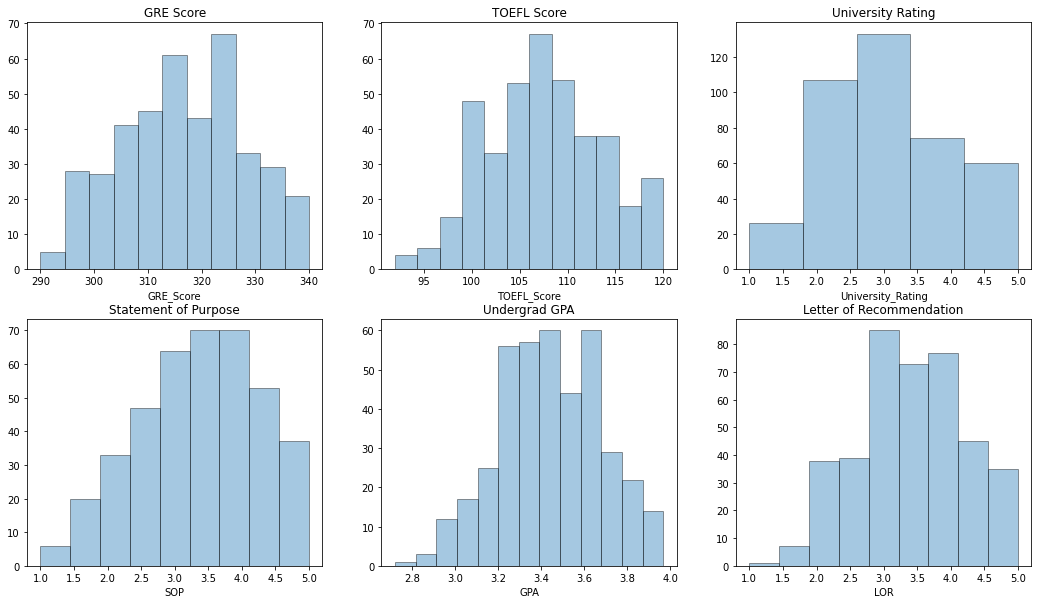

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.distplot(grad_admission['GRE_Score'],ax=axes[0, 0],kde=False).set_title('GRE Score')
sns.distplot(grad_admission['TOEFL_Score'],ax=axes[0, 1],kde=False).set_title('TOEFL Score')
sns.distplot(grad_admission['University_Rating'],ax=axes[0, 2],bins=5,kde=False).set_title('University Rating')
sns.distplot(grad_admission['SOP'],ax=axes[1, 0],bins=9,kde=False).set_title('Statement of Purpose')
sns.distplot(grad_admission['GPA'],ax=axes[1, 1],kde=False).set_title('Undergrad GPA')
sns.distplot(grad_admission['LOR'],ax=axes[1, 2],bins=9,kde=False).set_title( 'Letter of Recommendation')
print(grad_admission.columns)

**From the above plot we can see that the distribution of TOEFL score, GPA, CGPA and GRE score are quite NORMAL (with some outliers). It is clear from the distributions, students with varied merit apply for the university.**

**We also notice that distribution of 'University Rating', 'SOP' at a granular level is NOT NORMAL. The SOP column is left-skewed and 'University Rating' is right-skewed.**

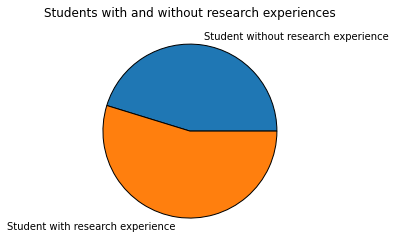

In [ ]:
x = [grad_admission['Research'].value_counts()[0], grad_admission['Research'].value_counts()[1]]
plt.pie(x, labels=['Student without research experience','Student with research experience'])
plt.title('Students with and without research experiences')
plt.show()

**As we can see a little over half the students have research experience. This makes sense because most of the undergrad students do not get to do research during their college but of the ones who apply to post-grad are the ones who prepare some research material because they think it will help them in getting into colleges.**

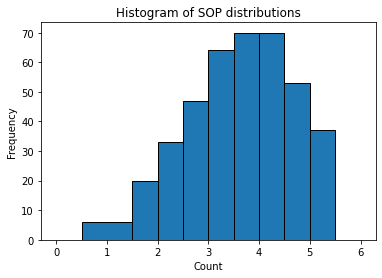

In [ ]:
plt.hist(grad_admission['SOP'], [0,0.5,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6] )
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.title("Histogram of SOP distributions")
plt.show()

**This distribution is NOT NORMAL. The distribution of the SOP looks like it is LEFT SKEWED.**

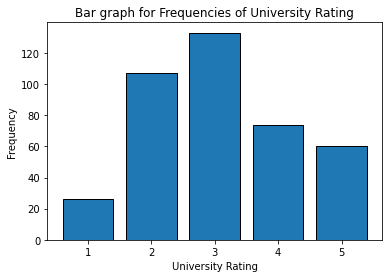

In [ ]:
x = grad_admission['University_Rating'].value_counts().keys()
y = grad_admission['University_Rating'].value_counts().values

plt.bar(x,y)
plt.title('Bar graph for Frequencies of University Rating')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.show()

**With this visualization we can see that most of the applicants apply to mid-range universities. This is a true depiction of the real world because most candidates apply to multiple "Safety-schools". These are the school that are not the most prestigious but provide quality education (rating 3 & 4).**

Index(['Nonresident_Alien', 'Women'], dtype='object')


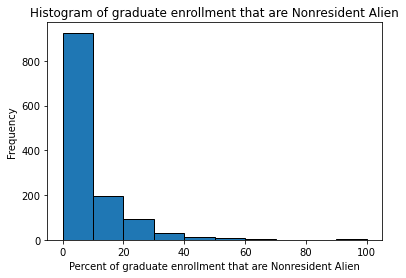

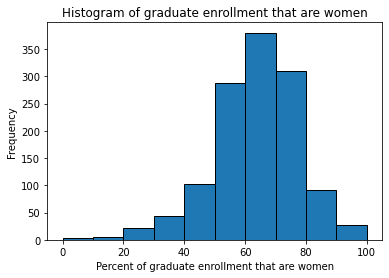

In [ ]:
print(graduate_enrollment.columns)
plt.hist(graduate_enrollment['Nonresident_Alien'])
plt.xlabel("Percent of graduate enrollment that are Nonresident Alien")
plt.ylabel("Frequency")
plt.title("Histogram of graduate enrollment that are Nonresident Alien")
plt.show()

plt.hist(graduate_enrollment['Women'])
plt.xlabel("Percent of graduate enrollment that are women")
plt.ylabel("Frequency")
plt.title("Histogram of graduate enrollment that are women")
plt.show()

**As we have seen earlier as well as through our histograms, outliers exist in this dataset especially in the right side of histogram of graduate enrollment that are Nonresident Alien. To normalize this, let's remove some rows with outliers in the column of `Nonresident_Alien`.**

**The histogram of graduate enrollment that are women is almost `NORMAL` looking slightly `left-skewed` with some outliers in the left. For now, we will not remove the outliers in the column `Women` because we want to see the relation between the two columns.**

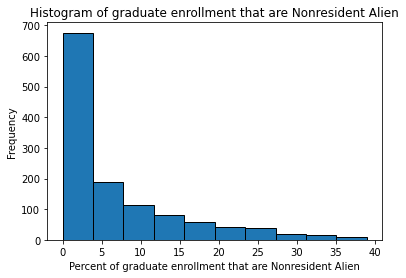

Highest  39.0


In [ ]:
nonresident_q_high = graduate_enrollment['Nonresident_Alien'].quantile(0.98)
graduate_enrollment = graduate_enrollment[graduate_enrollment['Nonresident_Alien'] < nonresident_q_high]
plt.hist(graduate_enrollment['Nonresident_Alien'])
plt.xlabel("Percent of graduate enrollment that are Nonresident Alien")
plt.ylabel("Frequency")
plt.title("Histogram of graduate enrollment that are Nonresident Alien")
plt.show()

print('Highest ', max(graduate_enrollment['Nonresident_Alien']))

**This histogram of graduate enrollment that are Nonresident Alien is `NOT NORMAL`, i.e, it is `right-skewed` with outliers in the right.**

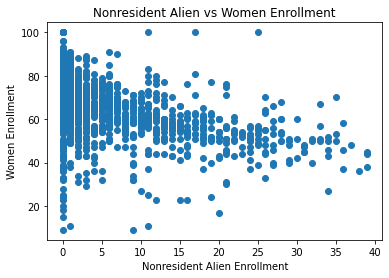

In [ ]:
plt.scatter(graduate_enrollment['Nonresident_Alien'],graduate_enrollment['Women'])
plt.xlabel('Nonresident Alien Enrollment')
plt.ylabel('Women Enrollment')
plt.title('Nonresident Alien vs Women Enrollment')
plt.show()

Looks like there is a **negative relation** between percentage of Nonresident Alien Enrollment and percentage of Women Enrollment, i.e. **higher** the percentage of Nonresident Alien Enrollment, **lower** the percentage of Women Enrollment.

### Visualization of Scraped Data

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Index(['Admit Year', 'Apps', 'Admits', 'Enroll', 'Admit Rate', 'Admit:Enroll'], dtype='object')


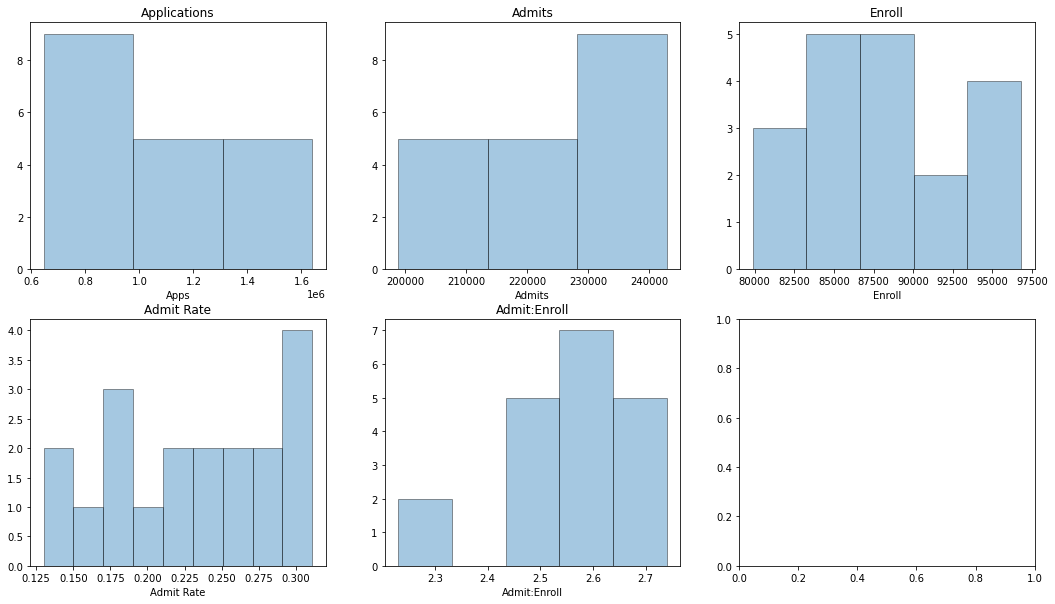

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.distplot(private_uni_admits['Apps'],ax=axes[0, 0],kde=False).set_title('Applications')
sns.distplot(private_uni_admits['Admits'],ax=axes[0, 1],kde=False).set_title('Admits')
sns.distplot(private_uni_admits['Enroll'],ax=axes[0, 2],bins=5,kde=False).set_title('Enroll')
sns.distplot(private_uni_admits['Admit Rate'],ax=axes[1, 0],bins=9,kde=False).set_title('Admit Rate')
sns.distplot(private_uni_admits['Admit:Enroll'],ax=axes[1, 1],kde=False).set_title('Admit:Enroll')
print(private_uni_admits.columns)

**We can see that non of the graphs are NORMAL. The Aplication number is right-skewed. The enrollment has a bell like structure but it does not appear to be totally NORMAL rather it is right skewed.**

# Data Sampling

In [ ]:
def systematic_sampling(df, step):
    df = shuffle(df)
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

**Sampling Plan:** Systematic Random Sampling

**Reason:** We can tune the step to get a normal distribution and it gives us a lot of control and flexibility of the data.

We are sampling without replacement for all the datasets. 
We chose to sample without replacement to avoid any duplicate scenarios.

In [ ]:
# Let's create a list of all the samples
step = 3
samples = []
for _ in range(100):
    samples.append(systematic_sampling(grad_admission, step))

In [ ]:
step = 3
samples_nonresident_and_women = []
for _ in range(100):
    samples_nonresident_and_women.append(systematic_sampling(graduate_enrollment, step))

In [ ]:
step = 3
samples_uni_admits = []
for _ in range(100):
    samples_uni_admits.append(systematic_sampling(private_uni_admits, step))

# Find Probability
Finding the probability of two events that must both happen in our data analysis<br>
Finding the probablity of an event that doesn't happen using our datasets.<br>
Finding the probability of event that is equally likely occur.


In [ ]:
prob_1 = []
prob_2 = []
prob_3 = []

acceptance_avgs = []

for sample in samples:
    TOFEL_avg = (sample.query('(GPA >= 3.0)').TOEFL_Score.mean())
    GRE_avg = (sample.query('(GPA >= 3.0)').GRE_Score.mean())
    
    if TOFEL_avg >= 100 and GRE_avg >= 316 :
        prob_1.append(1)
    else:
        prob_1.append(0)
    
    acceptance_avgs = (sample.query('(GPA <= 6.0)').Chance_of_Admit.mean())
    if acceptance_avgs >= 0.5:
        prob_2.append(1)
    else:
        prob_2.append(0)
    
    students_with_research = (sample.query('(Research == 1 and GPA >= 3)').Chance_of_Admit.mean())
    students_without_research = (sample.query('(Research == 0 and GPA >= 3)').Chance_of_Admit.mean())
    
    if (students_with_research - students_without_research) <= 0.2:
        prob_3.append(1)
    else:
        prob_3.append(0)
            

p1 = sum(prob_1) / len(samples)
p2 = sum(prob_2) / len(samples)
p3 = sum(prob_3) / len(samples)
print("Probability of two events both happening:")
print("Student with HIGH GPA and BOTH high GRE and TOEFL scores probability", p1)
print()
print("Probability of a event NOT happening:")
print("Student with LOW GPA having HIGH Chance_of_acceptance probability", p2)
print()
print("Probability of two equally likely events happening:")
print("Student with HIGH GPA with or without research have EQUAL chance of getting into college probaility:", p3)
print("The above has to be a high number(>=0.8) for both the events to occur.")

Probability of two events both happening:
Student with HIGH GPA and BOTH high GRE and TOEFL scores probability 0.98

Probability of a event NOT happening:
Student with LOW GPA having HIGH Chance_of_acceptance probability 1.0

Probability of two equally likely events happening:
Student with HIGH GPA with or without research have EQUAL chance of getting into college probaility: 1.0
The above has to be a high number(>=0.8) for both the events to occur.


In [ ]:
prob_1 = []
prob_2 = []
prob_3 = []

for sample in samples_nonresident_and_women:
    high_nonresident_low_Women = sample[(sample['Nonresident_Alien'] >= 15) & (sample['Women'] < 55)].count()/len(sample)
    prob_1.append(high_nonresident_low_Women)
    
    high_nonresident_high_Women = sample[(sample['Nonresident_Alien'] >= 15) & (sample['Women'] >= 80)].count()/len(sample)
    prob_2.append(high_nonresident_high_Women)
    
    low_nonresident_high_Women = sample[((sample['Nonresident_Alien'] >= 15) & (sample['Women'] < 35)) | ((sample['Nonresident_Alien'] < 15) & (sample['Women'] >= 80))].count()/len(sample)
    prob_3.append(low_nonresident_high_Women)
            

p1 = sum(prob_1) / len(samples)
p2 = sum(prob_2) / len(samples)
p3 = sum(prob_3) / len(samples)
print("Probability of two events both happening:")
print("University with HIGH Nonresident Alien Enrollment (>=15%) and LOW Women Enrollment (<55%):", p1)
print()
print("Probability of a event NOT happening:")
print("University with HIGH Women Enrollment (>=80%) having HIGH Nonresident Alien Enrollment(>=15%):", p2)
print()
print("Probability of two equally likely events happening:")
print("University with HIGH Women Enrollment (>=80%) having LOW Nonresident Alien Enrollment(<15%) or University with LOW Women Enrollment (<35%) having HIGH Nonresident Alien Enrollment(>=15%):", p3)

Probability of two events both happening:
University with HIGH Nonresident Alien Enrollment (>=15%) and LOW Women Enrollment (<55%): Nonresident_Alien    0.095253
Women                0.095253
dtype: float64

Probability of a event NOT happening:
University with HIGH Women Enrollment (>=80%) having HIGH Nonresident Alien Enrollment(>=15%): Nonresident_Alien    0.002627
Women                0.002627
dtype: float64

Probability of two equally likely events happening:
University with HIGH Women Enrollment (>=80%) having LOW Nonresident Alien Enrollment(<15%) or University with LOW Women Enrollment (<35%) having HIGH Nonresident Alien Enrollment(>=15%): Nonresident_Alien    0.100193
Women                0.100193
dtype: float64


In [ ]:
prob_1 = []
prob_2 = []
prob_3 = []

for sample in samples_uni_admits:
    admits_avg = sample.Admits.mean()
    enroll_avg = sample.Enroll.mean()
    
    if admits_avg >= 210000 and enroll_avg >= 85000:
        prob_1.append(1)
    else:
        prob_1.append(0)
    
    enroll_count = sample.Enroll.sum()
    admit_count = sample.Admits.sum()
    
    if enroll_count < admit_count:
        prob_2.append(1)
    else:
        prob_2.append(0)
        
    num_apps = sample.Apps.mean()
    admit_rate = sample["Admit Rate"].mean()
    
    if num_apps >= 1000000 and admit_rate < 0.2 or num_apps <= 1000000 and admit_rate > 0.2:
        prob_3.append(1)
    else:
        prob_3.append(0)
        
            
p1 = sum(prob_1) / len(samples)
p2 = sum(prob_2) / len(samples)
p3 = sum(prob_3) / len(samples)
print("Probability of two events both happening:")
print("Admision and enrollment are both high", p1)
print()
print("Probability of a event NOT happening:")
print("Enrollment is higher than the number of admitted students", p2)
print()
print("Probability of two equally likely events happening:")
print("Years having huge number of applications having low admission rates (below 20%)") 
print("and years having low number of applications having higher admission rates. ", p3)

Probability of two events both happening:
Admision and enrollment are both high 0.96

Probability of a event NOT happening:
Enrollment is higher than the number of admitted students 1.0

Probability of two equally likely events happening:
Years having huge number of applications having low admission rates (below 20%)
and years having low number of applications having higher admission rates.  0.4


# Testing Hypothesis

# Hypothesis

**Proposed Hypothesis 1: Does Higher GRE Score increases your chances of getting into Grad School?**

**Null Hypothesis:** Higher GRE Score does NOT increase your chances of getting into Grad School.
<br>
**Alternative Hypothesis:** Higher GRE Score increases your chances of getting into Grad School.

## Test Statistics 
**The test statistics will be the difference of mean acceptance rate of the dataset and the high GRE score applicants.**<br><br>
`test_statistic = mean_acceptance_rate_high_gre_scores - mean_acceptance_rate`

## Observed Values

In [ ]:
prob = []
for sample in samples:
    acceptance_mean_high_scorers = (sample.query('(GRE_Score >= 302)').Chance_of_Admit.mean())
    acceptance_mean = sample.Chance_of_Admit.mean()
    diff = acceptance_mean_high_scorers - acceptance_mean
    if diff >= 0.02:
        prob.append(1)
    else:
        prob.append(0)
print(sum(prob)/len(prob))

0.82


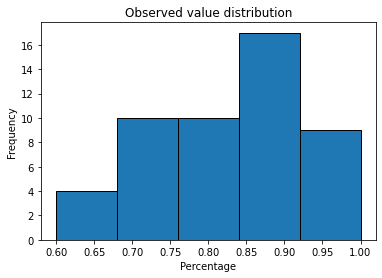

In [ ]:
# Running the sampling simulation 50 times.
final_probabilities = []
for _ in range(50):
    step = 3
    samples = []
    for _ in range(10):
        samples.append(systematic_sampling(grad_admission, step))
    prob = []
    for sample in samples:
        acceptance_mean_high_scorers = (sample.query('(GRE_Score >= 302)').Chance_of_Admit.mean())
        acceptance_mean = sample.Chance_of_Admit.mean()
        diff = acceptance_mean_high_scorers - acceptance_mean
        if diff >= 0.02:
            prob.append(1)
        else:
            prob.append(0)
    final_probabilities.append(sum(prob)/len(prob))

plt.hist(final_probabilities,bins=5, ec='black')
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.title("Observed value distribution")
plt.show()

## Calculating p-value

In [ ]:
# Let's use chisquare to calculate the p-value
chisquare(grad_admission.GRE_Score,grad_admission.Chance_of_Admit)

Power_divergenceResult(statistic=57133168.57405691, pvalue=0.0)

**We can see that the p-value is less that 0.05 so, rejecting Null Hypothesis and accepting Alternate Hypothesis. It means chance of admission is depending on GRE Score.**

## Using linear regression and Correlation to support Hypothesis

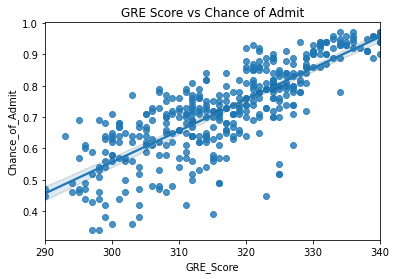

In [ ]:
fig = sns.regplot(x="GRE_Score", y="Chance_of_Admit", data=grad_admission)
plt.title("GRE Score vs Chance of Admit")
plt.show()

In [ ]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)
def correlation(arr1, arr2):
    return np.mean(standard_units(arr1)*standard_units(arr2))
gre_vs_chance_of_admit = correlation(grad_admission["GRE_Score"], grad_admission["Chance_of_Admit"])
print("The correlation factor for GRE score to Chance of admit is:", gre_vs_chance_of_admit)

The correlation factor for GRE score to Chance of admit is: 0.8026104595903505


**We can see that we have a very high correlation of about 80%. So, we can say that GRE scores and Chance of admission is dirrectly proportional.**

**We would like to use linear regression to model it.**

In [ ]:
def regression_parameters(x, y):
    y_mean = np.mean(y)
    slope = correlation(x, y)*np.std(y)/np.std(x) 
    intercept = y_mean-(slope*np.mean(x))
    return [slope, intercept]

parameters = regression_parameters(grad_admission["GRE_Score"], grad_admission["Chance_of_Admit"])
parameters

[0.009975882025681386, -2.436084244851056]

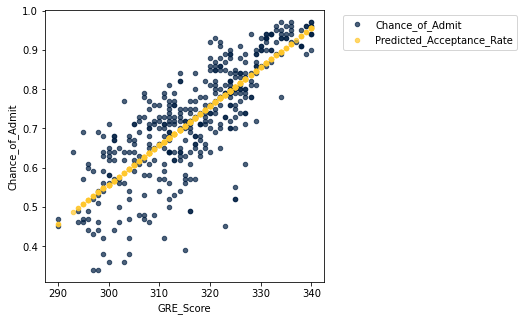

In [ ]:
predicted_acceptance = parameters[0]*grad_admission["GRE_Score"] + parameters[1]

pten = Table.from_df(grad_admission, keep_index= False)
(pten.with_column("Predicted_Acceptance_Rate", predicted_acceptance)
.select("GRE_Score", "Chance_of_Admit", "Predicted_Acceptance_Rate")
 .scatter("GRE_Score"))
plt.ylabel("Chance_of_Admit");

**Now lets try to calculate the RMSE - root mean squared error for this regression model.**

In [ ]:
def RMSE(slope, intercept):
    gre = grad_admission["GRE_Score"]
    acceptance = grad_admission["Chance_of_Admit"]
    predicted_acceptance = slope*gre + intercept
    return (np.mean((acceptance - predicted_acceptance)**2))**0.5

In [ ]:
print('RMSE of Predicted Chance of admission given a GRE score: ', RMSE(parameters[0],parameters[1]))

RMSE of Predicted Chance of admission given a GRE score:  0.08496056727604849


**Using a linear regression model, we can obtain a very good approximation of our chances of getting admitted to a college given out GRE score. This is because our RMSE is very low.**

<AxesSubplot:>

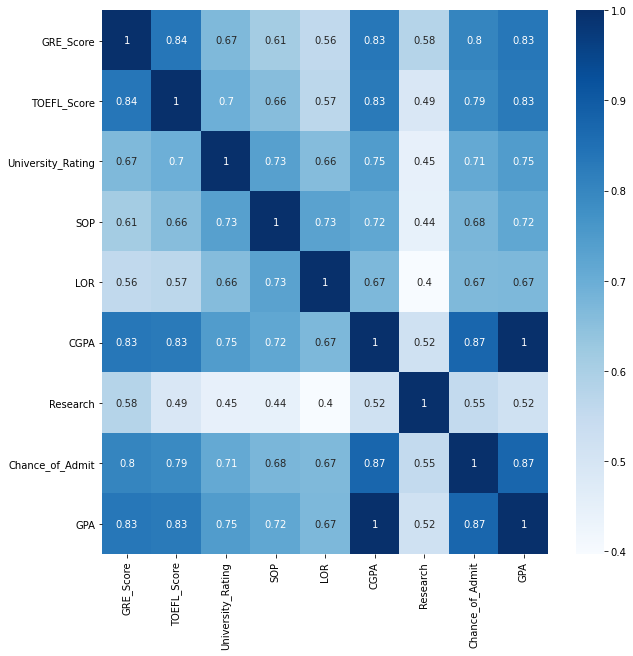

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(grad_admission.corr(), annot=True, cmap='Blues')

In [ ]:
def correlation(arr1, arr2):
    numerator = 0
    denominator_sum_1 = 0
    denominator_sum_2 = 0
    
    mean_x = sum(arr1) / len(arr1)
    mean_y = sum(arr2) / len(arr2)
    
    for i in range(len(arr1)):
        x_i = arr1[i]
        y_i = arr2[i]
        numerator += (x_i - mean_x) * (y_i - mean_y)
        denominator_sum_1 += ((x_i - mean_x)**2)
        denominator_sum_2 += ((y_i - mean_y)**2)
        
    denominator = ((denominator_sum_1 * denominator_sum_2) ** (1/2))
    return (numerator / denominator)

In [ ]:
GRE_vs_Chance_of_Admit = correlation(grad_admission["GRE_Score"], grad_admission["Chance_of_Admit"])
print("The correlation factor for GRE_Score to Chance_of_Admit is:", GRE_vs_Chance_of_Admit)

The correlation factor for GRE_Score to Chance_of_Admit is: 0.8026104595903509


## Hypothesis Tests Conclusions
Based on what you found about your topic communicate it to the audience. 


1. Maximum GRE score is 340 and Minimum GRE Score is 290. Average GRE score is 316.80 with a deviation of 11.47 from mean.Using BoxPlot for this Descriprive Analysis such as Minimum, Maximum and Quartiles.<br>
2. Chi Square test:P value is less than 0.05, So rejecting Null Hypothesis and accepting Alternate Hypothesis. It means chance of admission is depending on GRE Score.<br>
3. With the help of Histogram it is clear that Most of the Students are having GRE Score between 320 and 325.<br>
4. There is a Strong Positive Corelation of 80 % of GRE score with Chance of Admission. This means Chance of admission is increasing with increase in GRE Score. From scatter plot, it is clearly visible that on increasing GRE Score, Chance of Admission is also Increasing.

**So, looking at all this insights and testing out hypothesis using sampling, p-value, linear regression and correlation we reject the NULL hypothesis and accept the ALTERNATIVE hypothesis: Higher GRE Score increases your chances of getting into Grad School.**

# Hypothesis 2

**Hypothesis 2: Does Higher Enrollment of Non-resident Alien Decreases the Number of Women enrollment?**


**Null Hypothesis:** Higher enrollment of Non-resident Alien does NOT decrease the percentage of Women enrollment.

**Alternative Hypothesis:** Higher enrollment of Non-resident Alien decreases the percentage of Women enrollment.

## Test Statistics

The test statistics will be the difference of mean women enrollment for universities with high enrollment of non-resident aliens and mean women enrollment for universities with low enrollment of non-resident aliens.

`test_statistic = mean_women_enrollment_for_lower_enrollment_of_nonresident -  mean_women_enrollment_for_higher_enrollment_of_nonresident`

## Observed Values


In [ ]:
print(graduate_enrollment.columns)
print(graduate_enrollment['Nonresident_Alien'].mean())

Index(['Nonresident_Alien', 'Women'], dtype='object')
6.525341914722445


Let's see the difference between `mean_women_enrollment_for_lower_enrollment_of_nonresident` and `mean_women_enrollment_for_higher_enrollment_of_nonresident`. Since the mean of percentage of Nonresident Alien enrollment is `6.53` approximately, we will use it to **divide the samples** into higher and lower enrollments of nonresidents. 


In [ ]:
mean_women_enrollment_for_higher_enrollment_of_nonresident = (graduate_enrollment.query('(Nonresident_Alien >= 6.53)').Women.mean())
mean_women_enrollment_for_lower_enrollment_of_nonresident = (graduate_enrollment.query('(Nonresident_Alien < 6.53)').Women.mean())
test_statistic = mean_women_enrollment_for_lower_enrollment_of_nonresident - mean_women_enrollment_for_higher_enrollment_of_nonresident
test_statistic

10.881359460109174

`test_statitic` value from original dataset is **10.88**. To prove our hypothesis, though it is enough to show that the test statistic produces a **positive value (>0)** for most samples, we will use `9.75` for greater effectiveness and find the probability of getting 9.75 as test statistic in our simulations.

In [ ]:
def simulation_nonresident_and_women(samples_nonresident_and_women):
    prob = []
    for sample in samples_nonresident_and_women:
        mean_women_enrollment_for_higher_enrollment_of_nonresident = (sample.query('(Nonresident_Alien >= 6.53)').Women.mean())
        mean_women_enrollment_for_lower_enrollment_of_nonresident = (sample.query('(Nonresident_Alien < 6.53)').Women.mean())
        diff = mean_women_enrollment_for_lower_enrollment_of_nonresident - mean_women_enrollment_for_higher_enrollment_of_nonresident
        if diff >= 9.75:
            prob.append(1)
        else:
            prob.append(0)
    return sum(prob)/len(prob)
print(simulation_nonresident_and_women(samples_nonresident_and_women))

0.88


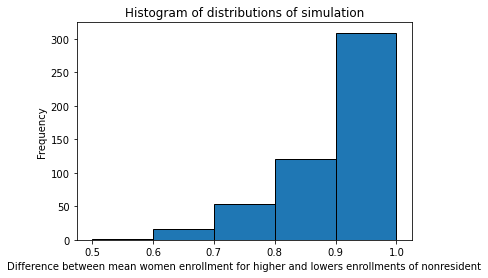

In [ ]:
# Running the sampling simulation 50 times.
final_probabilities = []
for _ in range(500):
    step = 3
    samples_women = []
    for _ in range(10):
        samples_women.append(systematic_sampling(graduate_enrollment, step))
    final_probabilities.append(simulation_nonresident_and_women(samples_women))

plt.hist(final_probabilities,bins=5, ec='black')
plt.xlabel("Difference between mean women enrollment for higher and lowers enrollments of nonresident")
plt.ylabel("Frequency")
plt.title("Histogram of distributions of simulation")
plt.show()

## Calculating p-value

In [ ]:
chisquare(graduate_enrollment.Nonresident_Alien,graduate_enrollment.Women)

Power_divergenceResult(statistic=65666.22701445356, pvalue=0.0)

We can see that the p-value is less that 5%. So, rejecting Null Hypothesis and accepting Alternate Hypothesis. It says higher enrollment of Non-resident Alien decreases the percentage of Women enrollment.

## Using Correlation and Linear regression to support Hypothesis

In [ ]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)
def correlation(arr1, arr2):
    return np.mean(standard_units(arr1)*standard_units(arr2))
Nonresident_Alien_vs_Women = correlation(graduate_enrollment["Nonresident_Alien"], graduate_enrollment["Women"])
print("The correlation factor for Nonresident_Alien to Women is:", Nonresident_Alien_vs_Women)

The correlation factor for Nonresident_Alien to Women is: -0.4180892509486783


Negative correlation factor simply shows the opposite trend of these two columns (i.e. higher the percentage of Nonresident_Alien enrollment, lower the percentage of Women enrollment). However, it isn't a very strong correlation since the absolute value is less than 0.5.

Let's apply linear regression. We will find **regression parameters** first.

In [ ]:
def regression_parameters(x, y):
    y_mean = np.mean(y)
    slope = correlation(x, y)*np.std(y)/np.std(x) 
    intercept = y_mean-(slope*np.mean(x))
    return [slope, intercept]

parameters = regression_parameters(graduate_enrollment["Nonresident_Alien"], graduate_enrollment["Women"])
parameters

[-0.6841768295563544, 68.13705411466741]

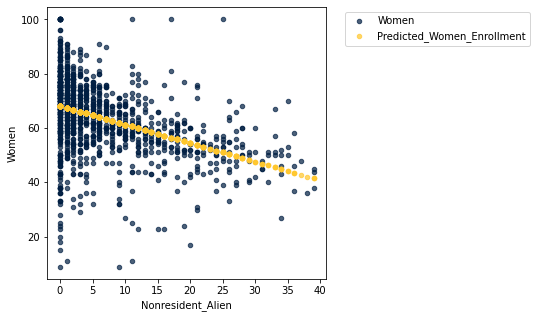

In [ ]:
predicted_women_enrollment = parameters[0]*graduate_enrollment["Nonresident_Alien"] + parameters[1]

pten2 = Table.from_df(graduate_enrollment, keep_index= False)
(pten2.with_column("Predicted_Women_Enrollment", predicted_women_enrollment)
.select("Nonresident_Alien", "Women", "Predicted_Women_Enrollment")
 .scatter("Nonresident_Alien"))
plt.ylabel("Women");

Let's look at the root mean square error for our linear regression model.

In [ ]:
def RMSE(slope, intercept):
    nonresident_alien = graduate_enrollment["Nonresident_Alien"]
    women = graduate_enrollment["Women"]
    predicted_women = slope*nonresident_alien + intercept
    return (np.mean((women - predicted_women)**2))**0.5


In [ ]:
print('RMSE of Predicted Enrollment of Women: ', RMSE(parameters[0],parameters[1]))

RMSE of Predicted Enrollment of Women:  12.34035379042034


Using a linear regression model, we would not be able to obtain a very accurate prediction for most of the points which is why we obtained high RMSE for this model. This is because our scatter plot of Nonresident_Alien enrollment vs Women enrollment is more scattered rather than forming a line which produce high RMSE in a linear regression model.

## Hypothesis Tests Conclusions

1. Difference between mean of Women Enrollment in Universities having LOW Nonresident Alien Enrollment and HIGH Nonresident Alien Enrollment is a positive value. The probability of the difference being greater than 9.75 is about **0.87**.
2. Chi Square test:P value is less than 0.05, So rejecting Null Hypothesis and accepting Alternate Hypothesis. It means higher enrollment of Non-resident Alien decreases the percentage of Women enrollment.
3. There is a **Negative Correlation of 42%** of High Nonresident Alien Enrollment with Low Women Enrollment. From scatter plot, we can see that on increasing Nonresident Alien Enrollment, Women Enrollment is decreasing. This means high percentage of enrollment of Non-resident Alien decreases the percentage of Women enrollment. 
4. Linear regression model with **RMSE 12.34** loosely supports this hypothesis conclusion.

So, looking at all this insights and testing out hypothesis using sampling, p-value, correlation, and linear regression, we reject the NULL hypothesis and accept the ALTERNATIVE hypothesis: **High percentage of Non-resident Alien enrollment decreases the percentage of Women enrollment.**

# Hypothesis 3
**Hypothesis 3: Does the admission rate decrease with higher number of applicants?**

**Null Hypothesis:** Higher number of applications does not decrease admission rate.
<br>
**Alternative Hypothesis:** Higher number of applications decreases admission rate.

## Test Statistics

The test statistics will be the difference of mean admit rate for years with high number of applications and the mean admit rate for years with low number of applications. 

`test_statistic = mean_admit_rate_for_high_apps -  mean_women_enrollment_for_low_apps`

## Observed Values

In [ ]:
print(private_uni_admits.columns)
print(private_uni_admits['Apps'].mean())

NameError: ignored

Let's see the difference between `mean_admit_rate_for_high_apps` and `mean_admit_rate_for_low_apps`. Since the mean of number of applications is `1048592` approximately, we will use it to **divide the samples** into higher and lower number of applications. 

In [ ]:
def simulation_admit_rates(samples):
    prob = []
    for sample in samples:
        mean_admit_rate_for_high_apps = sample[sample['Apps'] >= 1048592]['Admit Rate'].mean()
        mean_admit_rate_for_low_apps = sample[sample['Apps'] <= 1048592]['Admit Rate'].mean()
        diff = mean_admit_rate_for_high_apps - mean_admit_rate_for_low_apps
        if diff <= 0:
            prob.append(1)
        else:
            prob.append(0)
    return sum(prob)/len(prob)
print(simulation_admit_rates(samples_uni_admits))

In [ ]:
# Running the sampling simulation 50 times.
final_probabilities = []
for _ in range(50):
    step = 3
    samples = []
    for _ in range(10):
        samples.append(systematic_sampling(private_uni_admits, step))
    final_probabilities.append(simulation_admit_rates(samples))

plt.hist(final_probabilities,bins=3, ec='black')
plt.xlabel("Difference between mean admit rates higher and lowers number of applications")
plt.ylabel("Frequency")
plt.title("Histogram of distributions of simulation")
plt.show()

## Calculating p-value

In [ ]:
chisquare(private_uni_admits['Apps'], private_uni_admits['Admit Rate'])

We can see that the p-value is less that 5%. So, we reject the Null Hypothesis and accept the Alternate Hypothesis. It says that higher number of applications decreases admission rate.

## Using Correlation and Linear regression to support Hypothesis

In [ ]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)
def correlation(arr1, arr2):
    return np.mean(standard_units(arr1)*standard_units(arr2))
admit_rates_vs_apps = correlation(private_uni_admits["Apps"], private_uni_admits["Admit Rate"])
print("The correlation factor for number of applications to Admit Rate is:", admit_rates_vs_apps)

Negative correlation factor simply shows the opposite trend of these two columns (i.e. higher the percentage of Nonresident_Alien enrollment, lower the percentage of Women enrollment). However, it isn't a very strong correlation since the absolute value is less than 0.5.

Let's apply linear regression. We will find **regression parameters** first.

In [ ]:
def regression_parameters(x, y):
    y_mean = np.mean(y)
    slope = correlation(x, y)*np.std(y)/np.std(x) 
    intercept = y_mean-(slope*np.mean(x))
    return [slope, intercept]

parameters = regression_parameters(private_uni_admits["Apps"], private_uni_admits["Admit Rate"])
parameters

In [ ]:
predicted_admit_rate = parameters[0]*private_uni_admits["Apps"] + parameters[1]

pten3 = Table.from_df(private_uni_admits, keep_index= False)
(pten3.with_column("Predicted_Admits", predicted_admit_rate)
.select("Apps", "Admit Rate", "Predicted_Admits")
 .scatter("Apps"))
plt.ylabel("Admit Rate");

Let's look at the root mean square error for our linear regression model.

In [ ]:
def RMSE(slope, intercept):
    apps = private_uni_admits["Apps"]
    admit_rate = private_uni_admits["Admit Rate"]
    predicted_admit_rate = slope*apps + intercept
    return (np.mean((admit_rate - predicted_admit_rate)**2))**0.5

In [ ]:
print('RMSE of Predicted Admit rate and actual value: ', RMSE(parameters[0],parameters[1]))

Using a linear regression model, we were able to verify the fact that there is a negative corelation between the number of applications and admit rate. 

## Hypothesis Tests Conclusions


1. Difference between mean admit rate for high number of applications is lower than the mean admit rate for low number of applications. The probability of this happening is about 0.97.
2. Chi Square test:P value is less than 0.05, So rejecting Null Hypothesis and accepting Alternate Hypothesis. It means that for high number of applications, the admit rate is lower.
3. There is a Negative Correlation of 99.7% of High number of applications with admit rate. From scatter plot, we can see that if we increase the number of applications, the admit rates decreases. This means that higher the number of applications, lower the admit rate. 
4. Linear regression model  supports this hypothesis conclusion.

So, looking at all this insights and testing out hypothesis using sampling, p-value, correlation, and linear regression, we reject the NULL hypothesis and accept the ALTERNATIVE hypothesis: **High number of applications decrease admission rate.**

# Topic Conclusions

**So, now to summarise we can conclude by saying:<br>
    1. Higher GRE Score increases your chances of getting into Grad School.<br>
    2. Higher enrollment of Non-resident Alien decreases the percentage of Women enrollment.<br>
    3. Higher number of applicants decrease the admission rate.**

# Limitations

Here are the few limitations of our project:
1. It only talks about US admissions so, if your dream school is not in the US these analysis might not help you.
2. We can not use this analysis to extrapulate anything about undergraduate admissions because they have a very different admission process.
3. These datasets might not be able to help you with a specific school or major.

# Footnote on Ethics and Transparency

1. We understand that people might get mixed feelings seeing such a high correlation between grad admissions and GRE scores. However, there are few things we want to be TRANSPARENT about:
    1. This prediction will only work for US colleges
    2. The dataset does not give much idea about what field of study versus GRE scores
2. We understand that people might get sad seeing that higher the number of international student, the percent of women goes down. This claim might make the international community sad. We are NOT accusing  any community here or INADVERTENTLY AFFECTING them. The observed stats has such behaviour because most international students are men.
